In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
class CFGen:
    def __init__(self, intervals, functions):
        self.intervals = intervals
        self.functions = functions
        self.minimum   = self.intervals[0][0]
        self.maximum   = self.intervals[-1][-1]
        
    def __call__(self, x):
        for i, (a, b) in enumerate(self.intervals):
            if x >= a and x < b:
                return self.functions[i](x)
            else:
                continue
        if x < self.minimum or x > self.maximum:
            return None
    
    def generate(self):
        domains = []
        images  = []
        for interval, function in zip(self.intervals, self.functions):
            domain  = np.arange(interval[0], interval[1], 0.001)
            image   = function(domain)
            domains = np.concatenate([domains, domain])
            images  = np.concatenate([images, image])
        return domains, images
    
    def __mul__(self, other):
        domains, images = other.generate()
        images = np.array([self(x) for x in images])
        return domains, images

In [3]:
intervals = [
    [0, 1],
    [1, 3]
]

functions = [
    lambda x: 2*x,
    lambda x: -x + 3
]

F = CFGen(intervals, functions)

In [4]:
intervals = [
    [0, 2],
    [2, 3]
]

functions = [
    lambda x: 1.5*x,
    lambda x: -3*x + 9
]

G = CFGen(intervals, functions)

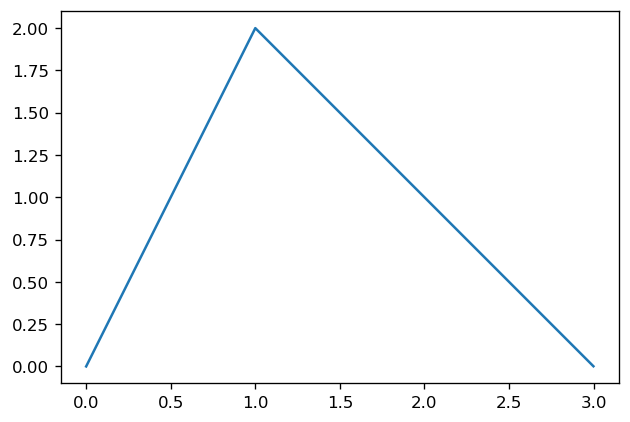

In [21]:
domain, image = F.generate()

plt.figure(figsize=(6,6), dpi=120)
plt.axes().set_aspect('equal')
plt.plot(domain, image)
plt.show()

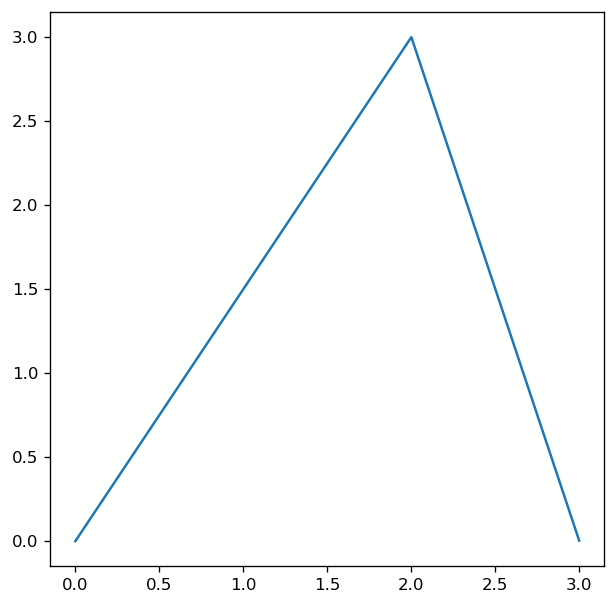

In [22]:
domain, image = G.generate()

plt.figure(figsize=(6,6), dpi=120)
plt.axes().set_aspect('equal')
plt.plot(domain, image)
plt.show()

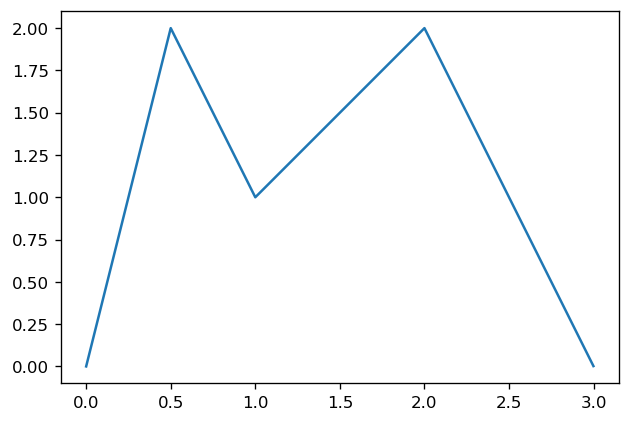

In [23]:
domain, image = F * F

plt.figure(figsize=(6,6), dpi=120)
plt.axes().set_aspect('equal')
plt.plot(domain, image)
plt.show()

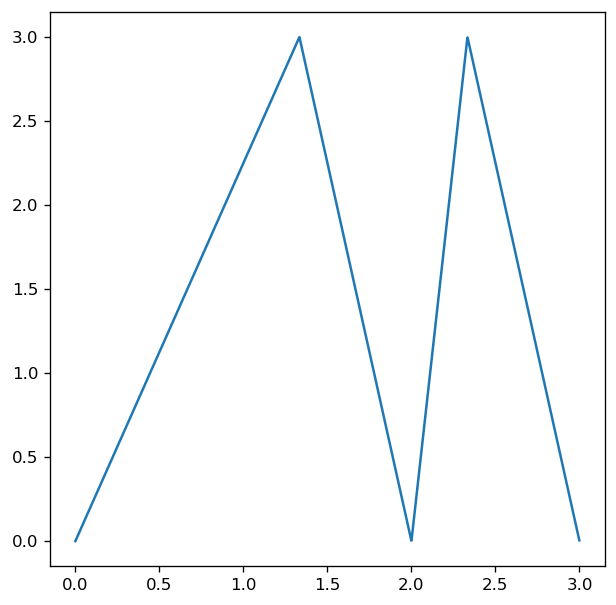

In [24]:
domain, image = G * G

plt.figure(figsize=(6,6), dpi=120)
plt.axes().set_aspect('equal')
plt.plot(domain, image)
plt.show()

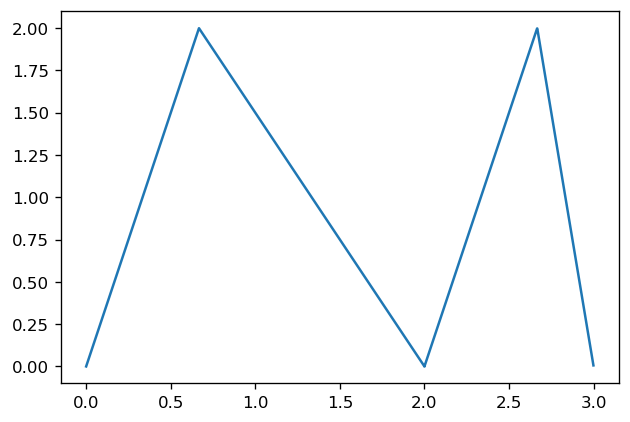

In [25]:
domain, image = F * G

plt.figure(figsize=(6,6), dpi=120)
plt.axes().set_aspect('equal')
plt.plot(domain, image)
plt.show()

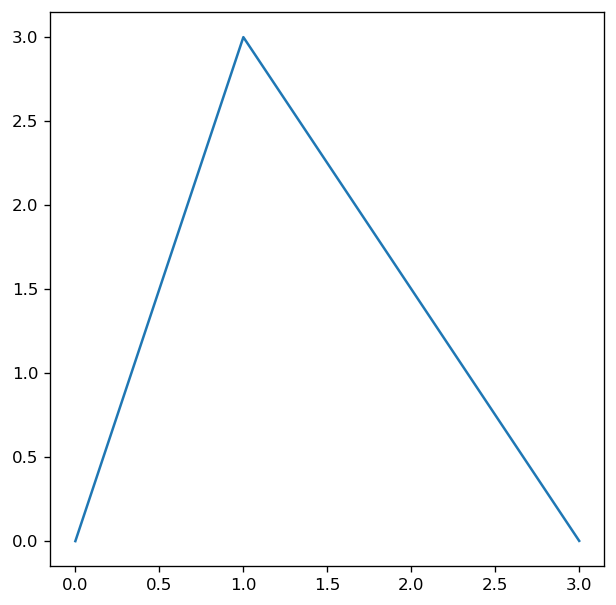

In [26]:
domain, image = G * F

plt.figure(figsize=(6,6), dpi=120)
plt.axes().set_aspect('equal')
plt.plot(domain, image)
plt.show()